<a href="https://colab.research.google.com/github/JCMisa/machine-learning-practice/blob/main/linear_regression_predicting_insurance_based_on_patient_data_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

medical_df = pd.read_csv("./insurance.csv")
medical_df.head()

# male = 1
# female = 0

# smoker yes = 1
# smoker no = 0

# southwest = 0
# southeast = 1
# northwest = 2
# northeast = 3

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

the following settings will improve the default style and font sizes for our charts

In [3]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Age

In [4]:
medical_df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [5]:
fig = px.histogram(medical_df,
                   x = 'age', # what column to use in the horizontal x axis
                   marginal = 'box', # shows an additional box at the top for better distribution analysis
                   nbins = 47, # tells how many boxes are there to show in a histogram
                   title = 'Distibution of Age')
fig.update_layout(bargap = 0.1) # adjust the spacing of each box
fig.show()

The distribution of ages in the dataset is almost uniform with 20-30 customers at every age, except for the ages 18 and 19, why is that? maybe because the insurance company offers lower insurance premium if you are 18 or 19

# Body Mass Index

In [6]:
medical_df.bmi.describe()

,bmi
count,1338.000000
mean,30.663397
std,6.098187
min,15.960000
25%,26.296250
50%,30.400000
75%,34.693750
max,53.130000


In [7]:
fig = px.histogram(medical_df,
                   x = 'bmi',
                   marginal = 'box',
                   color_discrete_sequence=['red'],
                   title = 'Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap = 0.1)
fig.show()

most people has a bmi of around 30 from 25 to 33 of bmi

# Charges

In [8]:
fig = px.histogram(medical_df,
                   x = 'charges',
                   marginal = 'box',
                   color = 'smoker',
                   color_discrete_sequence=['red', 'grey'],
                   title = 'Annual Medical Charges')
fig.update_layout(bargap = 0.1)
fig.show()



*   For most customers, the annual medical charges are under $10,000. Only a small fraction of customers have higher medical expenses, possibly due to accidents, major illnesses and genetic disease
*   There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is $7,300, the median for smokers is close to $35,000

people who are smoker seems to have a higher medical expense


# Smoker

In [9]:
medical_df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [10]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker by Sex')

mas madami ang male na smoker, at mas maunti naman ang male na non-smoker

# Age and Charges

In [11]:
fig = px.scatter(medical_df,
                 x = 'age',
                 y = 'charges',
                 color = 'smoker',
                 color_discrete_sequence=['red', 'blue'],
                 opacity = 0.8,
                 hover_data = ['sex'],
                 title = 'Age vs Charges')
fig.update_traces(marker_size = 5)
fig.show()

the higher the age, the higher the charge gets
if the patient is a smoker, regardless of gender, they charge seems to go up
but most prominently, as you grow old and you smoke, then there is a high probability that your charges are higher



*   the general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and its clear that age alone cannot be used to accurately determine medical charges
*   we can see three clusters of points, each of which seems to form a line with an increasing slope:

1.   The first and the largest cluster consisting primary of presumably healthy non-smokers who have relatively low medical charges compared to others
2.   The second cluster contains a mix of smokers and non-smokers. Its possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues"
3. The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking





# BMI and Charges

In [12]:
fig = px.scatter(medical_df,
                 x = 'bmi',
                 y = 'charges',
                 color = 'smoker',
                 color_discrete_sequence=['red', 'blue'],
                 opacity = 0.8,
                 hover_data = ['sex'],
                 title = 'BMI vs Charges')
fig.update_traces(marker_size = 5)
fig.show()

it appears that for non-smokers, an increase in BMI doesnt seem to be related to an increase in medical charges. Howeever, medical charges seem to be significantly higher for smokers with a BMI greater than 30 (obese smokers)

# Correlation

the nearer to 1 the correlation, the better relation two variable have
must be numeric data to correlate between columns

In [13]:
medical_df.charges.corr(medical_df.age) # higher correlation than bmi

np.float64(0.2990081933306476)

In [14]:
medical_df.charges.corr(medical_df.bmi) # low correlation

np.float64(0.19834096883362895)

since smoker column is non-numeric, you cant corelate it to charges column, UNLESS, you convert the column first to numeric one

In [15]:
smoker_values = {'yes': 1, 'no': 0}
smoker_numeric = medical_df.smoker.map(smoker_values)
smoker_numeric

# or

#  smoker_numeric = [smoker_values[item] for item in medical_df.smoker]
#  smoker_numeric

,smoker
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [16]:
medical_df.charges.corr(smoker_numeric) # high correlation between charges and smoking

np.float64(0.787251430498478)

In [17]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
# male = 1
# female = 0

# smoker yes = 1
# smoker no = 0

# southwest = 0
# southeast = 1
# northwest = 2
# northeast = 3

medical_df['sex'] = medical_df['sex'].replace({'male': 1, 'female': 0})
medical_df['smoker'] = medical_df['smoker'].replace({'yes': 1, 'no': 0})
medical_df['region'] = medical_df['region'].replace({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})

medical_df.head()

<ipython-input-18-bc991858ca12>:12: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-18-bc991858ca12>:13: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-18-bc991858ca12>:14: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [19]:
medical_df.corr() # shows all the correlation between columns

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,-0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


charges col has .29 correlation in age col
charges col has .05 correlation in sex col
charges col has .78 correlation with smoker which is good correlation

Text(0.5, 1.0, 'Correlation Matrix')

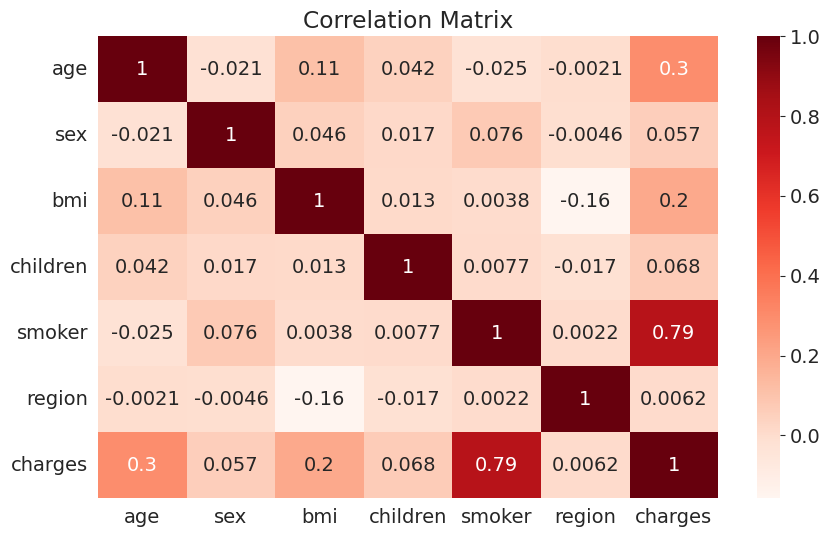

In [20]:
# we can use heatmap to better understand the correlation between columns

sns.heatmap(medical_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

# Linear Regression using a Single Feature

we know that the "smoker" and "age" cols have te strongest correlation with "charges". Lets try yo find a way of estimating the value of "charges" using the value of "age" for non-smokers.

In [21]:
none_smoker_df = medical_df[medical_df.smoker == 0]

<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges'>

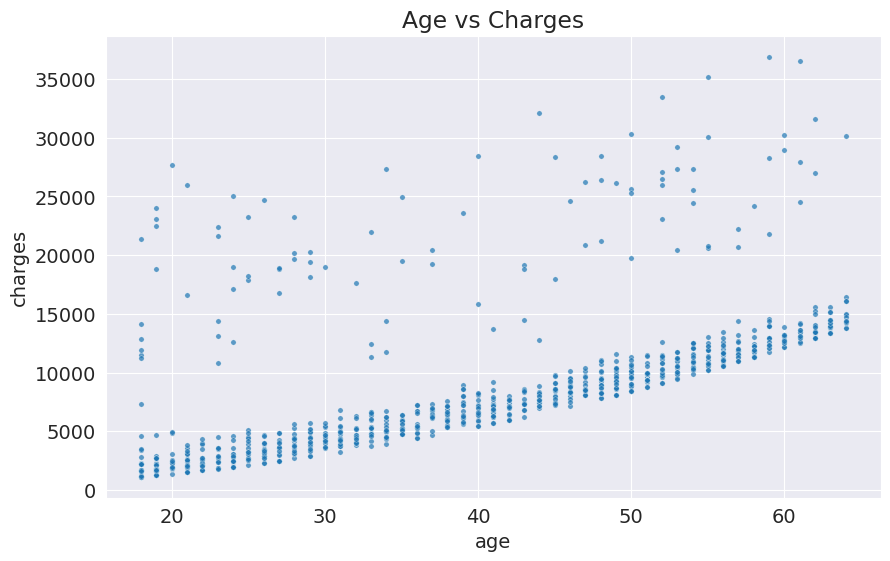

In [22]:
plt.title('Age vs Charges')
sns.scatterplot(data = none_smoker_df,
                x = 'age',
                y = 'charges',
                alpha = 0.7,
                s = 15)

# Model

In the above case, the x axis shows 'age' and the y axis shows 'charges'. Thus, were assume the following relationship between the two:

charges = (w * age) + b

well try determine w and b for the line that best fits the data
* This technique is called linear regression, and we call the above equation a linear regression model, because it models the relationship between 'age' and 'charges' as a straight line.
* the numbers w and b are called the parameters or weights of the model
* the values in the 'age' column of the dataset are called the inputs to the model and the values in the charges column are called 'targets'.

In [23]:
# this is our first model function

def estimate_charges(age, w, b):
  return (w * age) + b

In [24]:
w = 50
b = 100

ages = none_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)
print(f'Estimated Charges:\n{estimated_charges}\n\nActual Charges:\n{none_smoker_df.charges}')

Estimated Charges:
1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

Actual Charges:
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64


Text(0, 0.5, 'Estimated Charges')

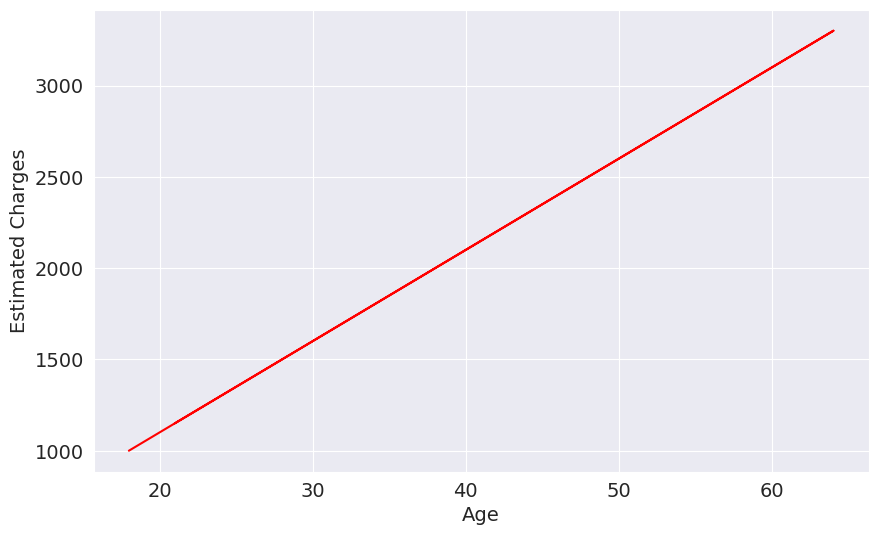

In [25]:
plt.plot(ages, estimated_charges, 'r')
plt.xlabel('Age')
plt.ylabel('Estimated Charges')

we can overlay this line on the actual data, so see how well our model fits the data

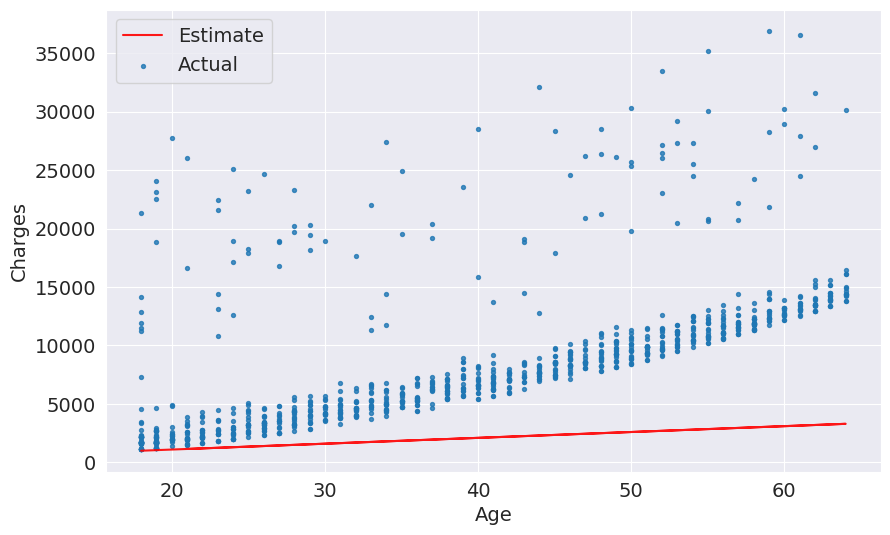

In [26]:
target = none_smoker_df.charges
plt.plot(ages, estimated_charges, 'r', alpha=0.9)

plt.scatter(ages, target, s=8, alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual'])

clearly, our estimate are quite poor and the line does not fit the data. Hpowever, we can try different values of w and b to move the line around. Lets define a helper function **try_parameters** which takes w  and b as inputs and creates the above plot.

In [27]:
def try_parameters(w, b):
  ages = none_smoker_df.age
  target = none_smoker_df.charges

  estimated_charges = estimate_charges(ages, w, b)

  plt.plot(ages, estimated_charges, 'r', alpha=0.9)
  plt.scatter(ages, target, s=8, alpha=0.8)
  plt.xlabel('Age')
  plt.ylabel('Charges')
  plt.legend(['Estimate', 'Actual'])

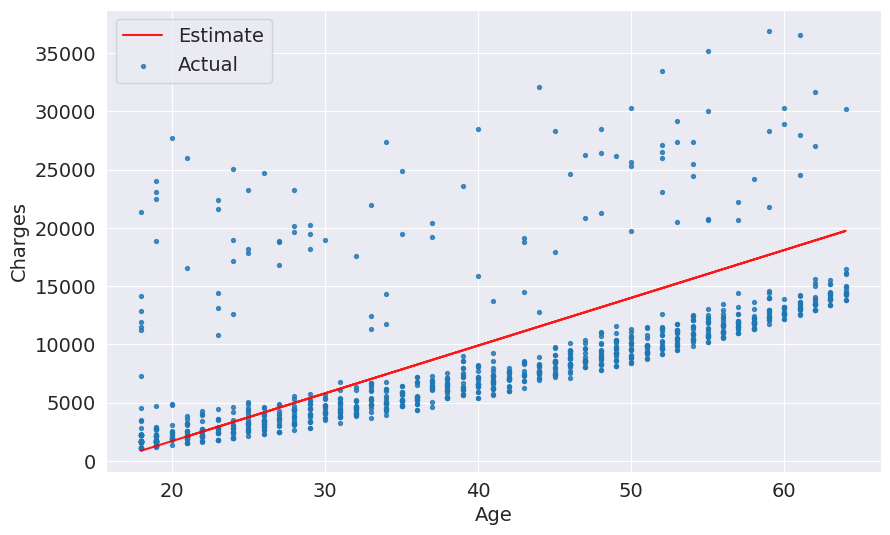

In [28]:
try_parameters(410, -6500)

as we change the valies of w and b manually, trying to move the line visually closer to the ponts, we are learning the approcimate relationship between age and charges

wouldnt it be nice if a computer could try several different value of w and b and learn the relationship between age and charges? to do this, we need to solve a couple of problems:

1. we need a way to measure numerically how well the line fits the points
2. once the measure of fit has been computed, we need a way to modify w and b to improve the fit.

if we can solve the above problems, it should be possible for a compoter ro determine w and b for the fit line, starting from a random guess.

# Loss/Cost Functions

we can compare our model prediction with the actual targets using the following method:
* calculate te difference between the targets and predictions (the difference is called the residual)
* square all elements of the difference matrix to remove negative values
* calculate the average of the elements in the resulting matrix
* take the square root of the result

the result is a single number known as **ROOT MEAN SQUARED ERROR** (RMSE)
[RMSE Formula](https://www.includehelp.com/ml-ai/Images/rmse-1.jpg)

In [29]:
# first try to subtract value for prediction charges and actual target charges of each record to get the residual
# second get squared ^2 of each residual difference
# third is to sum up all the residuals
# fourth is to divide the sum to the total number of records we have in th dataset
# fifth is get the square root of the result
targets = none_smoker_df.charges
predictions = estimated_charges

print(f'Prediction Charges:\n{predictions}\n\nActual Charges:\n{targets}')

Prediction Charges:
1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

Actual Charges:
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64


# Take that in Action

In [30]:
import numpy as np

In [31]:
def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(predictions - targets)))

In [32]:
w = 50
b = 100

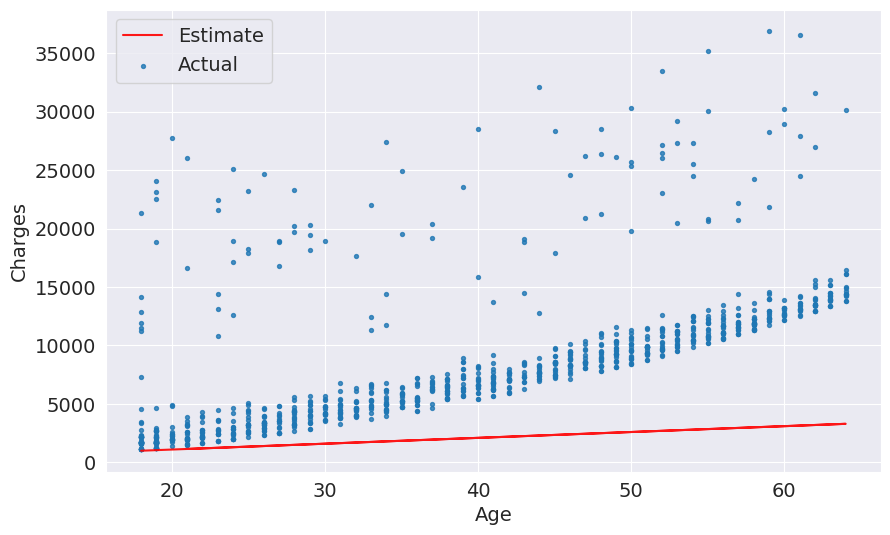

In [33]:
try_parameters (w, b)

In [34]:
targets = none_smoker_df.charges
predictions = estimate_charges(none_smoker_df.age, w, b)

In [35]:
rmse(targets, predictions) # $8461 is the gap between your model prediction and the actual charges

np.float64(8461.949562575493)

how can we interpret the above RMSE result:
on average, each elemnt in the prediction difers from the actual target by $8461

the result is called the loss because it indicates how bad the model is at predicting the target variables. It represents information loss in the model: **The lower the loss, the better the model**

In [36]:
# lets modify te try_parameters functions to also display the loss

def try_parameters(w, b):
  ages = none_smoker_df.age
  target = none_smoker_df.charges
  predictions = estimate_charges(ages, w, b)

  plt.plot(ages, predictions, 'r', alpha=0.9)
  plt.scatter(ages, target, s=8, alpha=0.8)
  plt.xlabel('Age')
  plt.ylabel('Charges')
  plt.legend(['Predictions', 'Actual'])

  loss = rmse(target, predictions)
  print(f'RMSE Loss: {loss}')

RMSE Loss: 4844.362114162155


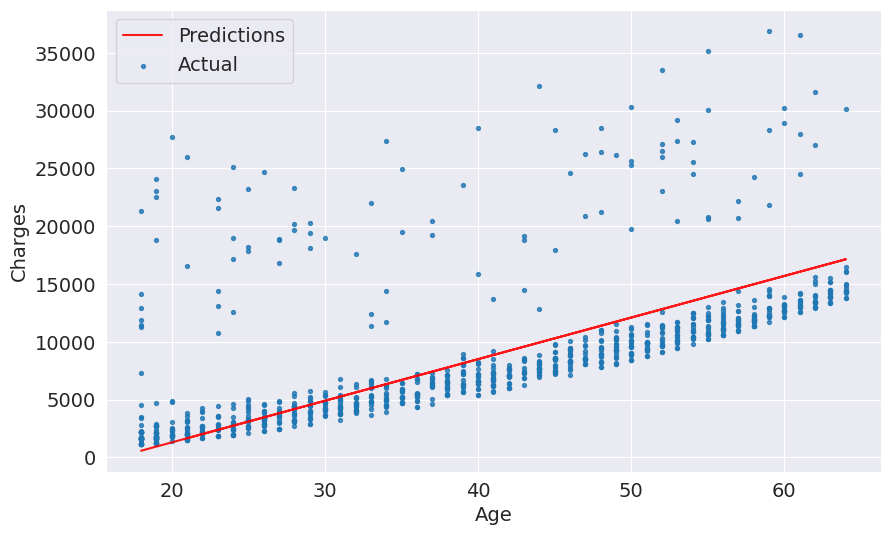

In [37]:
try_parameters(360, -5900)

# Organizer

next, we need a strategy to modify weights w and b to reduce the loss and improve the fit of the line to the data.

* [Ordinary Least Squares](https://www.youtube.com/watch?v=RdvKNJzUWyo) (better for smaller datasets)
* [Stochastic gradient descent](https://www.youtube.com/watch?v=vMh0zPT0tLI) (better for larger datasets)

both of these have the same objective: to minimize the loss, however, while ordinary least squares directly computes the best values for w and b using matrix opearations, while gradient descent uses a iterative approach, starting with random values of w and b and slowly imrpoving them using derivatives.

# Linear Regression using Scikit-learn

In practice, youll never need to implement either of the above methods yourself. You can use a library like scikit-learn to do this for you

In [38]:
# lets uuse the LinearRegression class from SL to find the best fit line for the 'age' vs 'charges' using the ordinary least squares technique

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

In [39]:
model = LinearRegression() # this one uses the Ordinary Least Squares technique by default
# model = SGDRegressor() # this one uses the Stochastic gradient descent

In [40]:
# not that the input X must be a 2d array, so well need to pass a dataframe, instead of a single column

inputs = none_smoker_df[['age']]
targets = none_smoker_df.charges

In [41]:
# now fit the input and target or the input and output sets

model.fit(inputs, targets)

LinearRegression()

In [42]:
# we can now make predictions using the model, Lets try predicting the charges for the ages 23, 37, and 61

predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [43]:
rmse(targets, predictions)

np.float64(4662.505766636395)

seems like our predictions is off by $4000 on average, which is not too bad considering the fact that there are several outliers

the parametes of the model are stored in the coef_ and intercept_ properties

In [44]:
# w
model.coef_

array([267.24891283])

In [45]:
# b
model.intercept_

np.float64(-2091.4205565650864)

RMSE Loss: 4662.505766636395


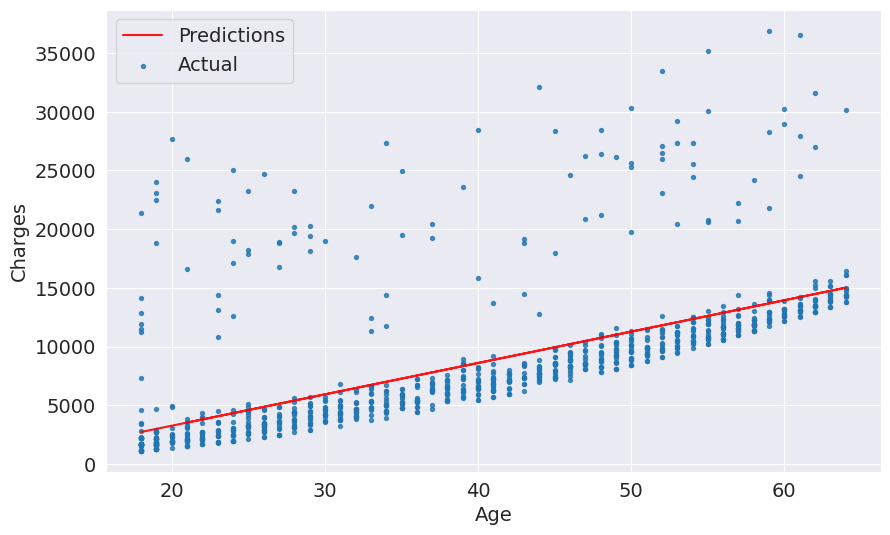

In [46]:
# lets visualize the line created by the above parameters

try_parameters(model.coef_, model.intercept_)

indeed the line was quite close to the points. it is slightly above the cluster of points becase its also trying to account for the outliers

# Lets Practice What we've Learned

I need to do the same for the smokers records in the medical_df dataframe

In [47]:
smokers_df = medical_df[medical_df.smoker == 1]

<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges'>

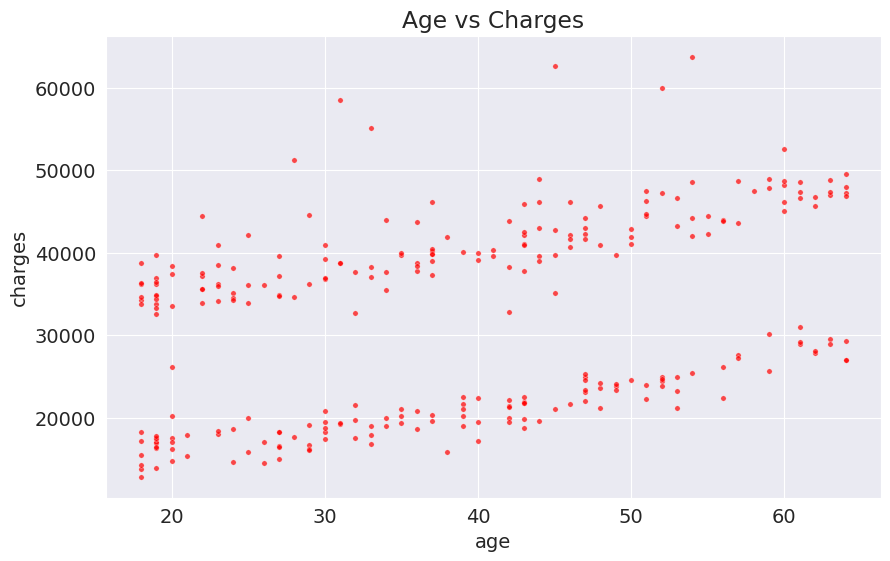

In [48]:
plt.title('Age vs Charges')
sns.scatterplot(data = smokers_df,
                x = 'age',
                y = 'charges',
                alpha = 0.7,
                s = 15,
                color = 'red')

In [49]:
w = 50
b = 100

ages = smokers_df.age
estimated_charges = estimate_charges(ages, w, b)
print(f'Estimated Charges:\n{estimated_charges}\n\nActual Charges:\n{smokers_df.charges}')

Estimated Charges:
0       1050
11      3200
14      1450
19      1600
23      1800
        ... 
1313    1050
1314    1600
1321    3200
1323    2200
1337    3150
Name: age, Length: 274, dtype: int64

Actual Charges:
0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64


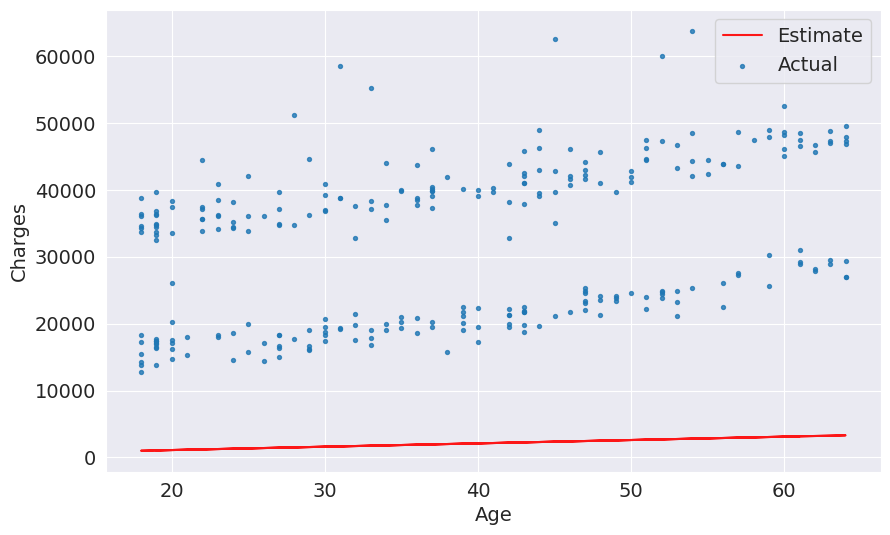

In [50]:
target = smokers_df.charges
plt.plot(ages, estimated_charges, 'r', alpha=0.9)

plt.scatter(ages, target, s=8, alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual'])

In [51]:
def get_weights(w, b):
  ages = smokers_df.age
  target = smokers_df.charges

  estimated_charges = estimate_charges(ages, w, b)

  plt.plot(ages, estimated_charges, 'r', alpha=0.9)
  plt.scatter(ages, target, s=8, alpha=0.8)
  plt.xlabel('Age')
  plt.ylabel('Charges')
  plt.legend(['Estimate', 'Actual'])

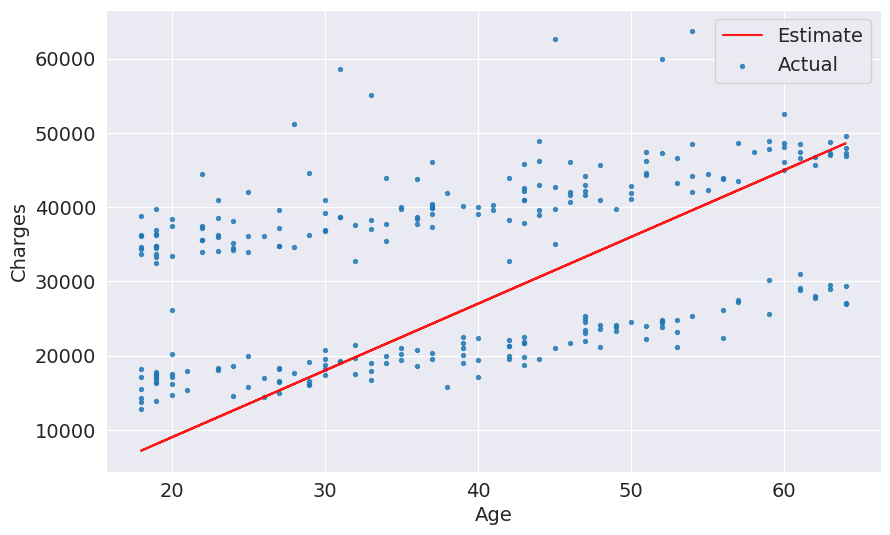

In [52]:
get_weights(900, -9000)

In [53]:
# lets modify te try_parameters functions to also display the loss

def get_weights(w, b):
  ages = smokers_df.age
  target = smokers_df.charges
  predictions = estimate_charges(ages, w, b)

  plt.plot(ages, predictions, 'r', alpha=0.9)
  plt.scatter(ages, target, s=8, alpha=0.8)
  plt.xlabel('Age')
  plt.ylabel('Charges')
  plt.legend(['Predictions', 'Actual'])

  loss = rmse(target, predictions)
  print(f'RMSE Loss: {loss}')

RMSE Loss: 14961.45142457651


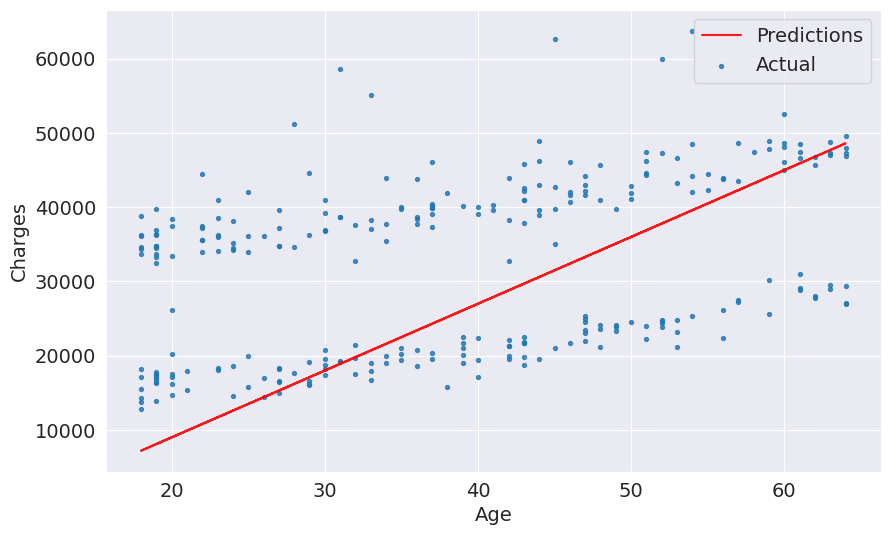

In [54]:
get_weights(900, -9000)

In [55]:
model = LinearRegression()

inputs = smokers_df[['age']]
targets = smokers_df.charges

model.fit(inputs, targets)

LinearRegression()

In [56]:
predictions = model.predict(inputs)
predictions

array([26093.642567  , 39218.85945773, 28535.54338388, 29451.25619021,
       30672.20659865, 29756.49379232, 27009.35537333, 28840.78098599,
       30977.44420076, 38608.38425351, 31282.68180287, 34945.53302819,
       31282.68180287, 37997.90904929, 25788.40496489, 36471.72103874,
       26398.88016911, 28840.78098599, 28535.54338388, 27009.35537333,
       31587.91940498, 34029.82022186, 37692.67144718, 38303.1466514 ,
       39829.33466195, 37387.43384507, 31893.15700709, 38913.62185562,
       26398.88016911, 39524.09705984, 29146.0185881 , 33724.58261975,
       26093.642567  , 30061.73139443, 30672.20659865, 29451.25619021,
       34335.05782397, 33114.10741553, 34945.53302819, 25788.40496489,
       29451.25619021, 33114.10741553, 25788.40496489, 39524.09705984,
       31282.68180287, 28535.54338388, 30977.44420076, 26093.642567  ,
       33114.10741553, 32503.63221131, 26093.642567  , 27314.59297544,
       39524.09705984, 25788.40496489, 39524.09705984, 36776.95864085,
      

In [57]:
rmse(targets, predictions)

np.float64(10711.00334810241)

RMSE Loss: 10711.00334810241


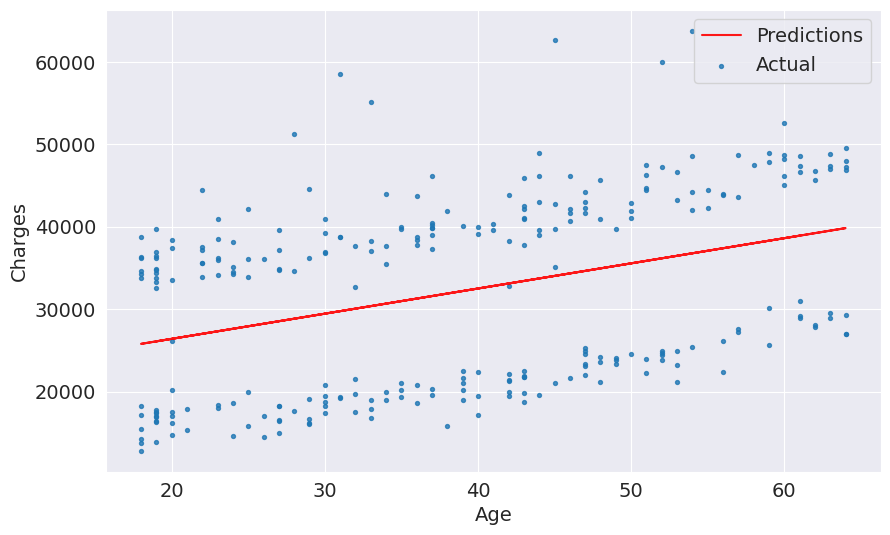

In [58]:
get_weights(model.coef_, model.intercept_)

# Machine Learning

every machine learning has three components:
1. Model
2. Cost Function
3. Optimizer

As weve seen above, it takes just a few lines of code to tran a machine learning model using scikit-learn

In [59]:
# create a inputs and targets
inputs, targets = none_smoker_df[['age']], none_smoker_df['charges']

# create and train the model
model = LinearRegression()
model.fit(inputs, targets)

# generate predictions
predictions = model.predict(inputs)

# calculate the loss to evaluate the model
loss = rmse(targets, predictions)
print(f'RMSE Loss: {loss}')

# you can also use this built-in  function from sklearn to calculate the rmse
from sklearn.metrics import root_mean_squared_error
print(f'RMSE Loss: {root_mean_squared_error(targets, predictions)}')

RMSE Loss: 4662.505766636395
RMSE Loss: 4662.505766636395


# Linear Regression using Multiple Features

So far, weve used on the 'age' feature to estimate 'charges'. Adding another feature like 'bmi' is fairly straightforward. We simply assume the following relationship:

**charges = ((w1 * age) + (w2 * bmi)) + b**

we nee to change just one line of code to include the BMI

In [60]:
# create input and targets
inputs, targets = none_smoker_df[['age', 'bmi']], none_smoker_df['charges']

# create and train the model
model = LinearRegression()
model.fit(inputs, targets)

# generate predictions
predictions = model.predict(inputs)

# calculate the loss to evaluate the model
loss = rmse(targets, predictions)
print(f'RMSE Loss: {loss}')

RMSE Loss: 4662.3128354612945


as you can see, adding the BMI doesnt seem to reduce the loss by much, as the BMI has a very weak correlation with charges, especially for non smokers

In [61]:
none_smoker_df.charges.corr(none_smoker_df.bmi)

np.float64(0.0840365431283327)

In [62]:
fig = px.scatter(none_smoker_df, x = 'bmi', y = 'charges', title = 'BMI vs. Charges')
fig.update_traces(marker_size = 5)
fig.show()

lets go one step and add the final numeric column ' children' which seems to have some correlation with 'charges'

charges = ((wz * age) + (w2 * bmi) + (w3 * children)) + b

In [63]:
none_smoker_df.charges.corr(none_smoker_df.children)

np.float64(0.13892870453542192)

In [64]:
fig = px.strip(none_smoker_df, x = 'children', y = 'charges', title = 'Children vs. Charges')
fig.update_traces(marker_size = 4, marker_opacity = 0.7)
fig.show()

In [65]:
# create input and targets
inputs, targets = none_smoker_df[['age', 'bmi', 'children']], none_smoker_df['charges']

# create and train the model
model = LinearRegression()
model.fit(inputs, targets)

# generate predictions
predictions = model.predict(inputs)

# calculate the loss to evaluate the model
loss = rmse(targets, predictions)
print(f'RMSE Loss: {loss}')

RMSE Loss: 4608.470405038247


now lets use the entire data set 'medical_df' disregarding if a patient is smoker or non-smoker

In [66]:
# create input and targets
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']

# create and train the model
model = LinearRegression()
model.fit(inputs, targets)

# generate predictions
predictions = model.predict(inputs)

# calculate the loss to evaluate the model
loss = rmse(targets, predictions)
print(f'RMSE Loss: {loss}')

RMSE Loss: 11355.317901125973


In [67]:
px.scatter(medical_df, x = 'age', y = 'charges', title = 'Age vs. Charges', color="smoker")

the result of rmse i far more furter and very bad as the data is clustered and very far from the 1st clust where we see a regression

# Using Categorical Features for Machine Learning

so far, weve been using only numeric columns, since we can only perform computations with numbers. If we could use categorical columns like 'smoker', we can train a single model for the entire dataset.

To use the categorical columns, we simply need to convert them to numers. There are three common techniques for doing this:

1. if a categorical column has just two categories (its called a binary category), then we can replace their values with 0  and 1
2. if a categorical column has more than 2 categories, we can perform one-hot encouding i.e. create a new column for each category with 1s and 0s
3. if the categories have a natural order (eg. cold, neutral, warm, hot), then they can be converted to numbers (eg. 1, 2, 3, 4) preserving the order. These are called ordinals

# Binary Categories
the 'smoker' category has just two values 'yes' and 'no'. Lets create a new column 'smoker_code' containing 0 for 'no' and 1 for 'yes'

In [68]:
# this is the original dataframe
medical_df = pd.read_csv("./insurance.csv")
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: xlabel='smoker', ylabel='charges'>

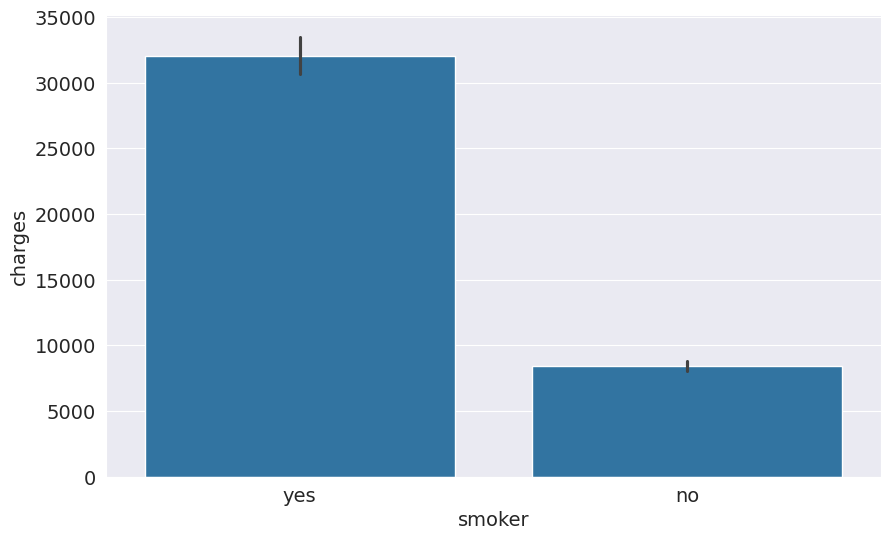

In [69]:
sns.barplot(data=medical_df, x='smoker', y='charges')

In [70]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [71]:
medical_df.charges.corr(medical_df.smoker_code)

np.float64(0.787251430498478)

In [72]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


we can now use the smoker_df column for linear regression

charges = ((wz * age) + (w2 * bmi) + (w3 * children) + (w4 * smoker)) + b

In [73]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

model = LinearRegression()
model.fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print(f'RMSE Loss: {loss}')

RMSE Loss: 6056.439217188081


the loss reduces from 11,355 to 6,056, almost half, this is an important lesson: never ignore categorical data

lets try adding the 'sex' column as well

charges = ((wz * age) + (w2 * bmi) + (w3 * children) + (w4 * smoker) + (w5 * sex)) + b

<Axes: xlabel='sex', ylabel='charges'>

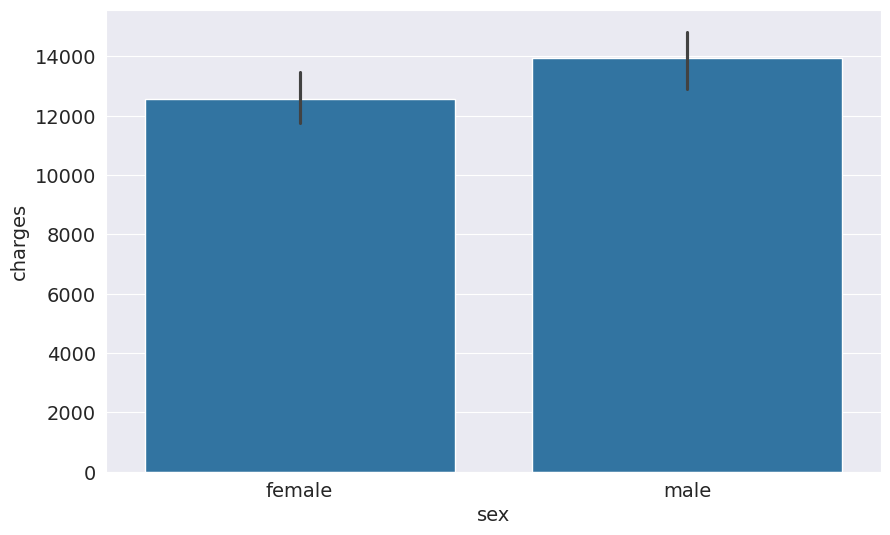

In [74]:
sns.barplot(data=medical_df, x='sex', y='charges')

In [75]:
sex_codes = {'female':0, 'male':1}

In [76]:
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [77]:
medical_df.charges.corr(medical_df.sex_code)

np.float64(0.057292062202025484)

In [78]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1


In [79]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']

model = LinearRegression()
model.fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print(f'RMSE Loss: {loss}')

RMSE Loss: 6056.100708754546


# One-hot Encoding

te 'region' column has 4 values, so well need to use hot encoding and create a new column for each region

<Axes: xlabel='region', ylabel='charges'>

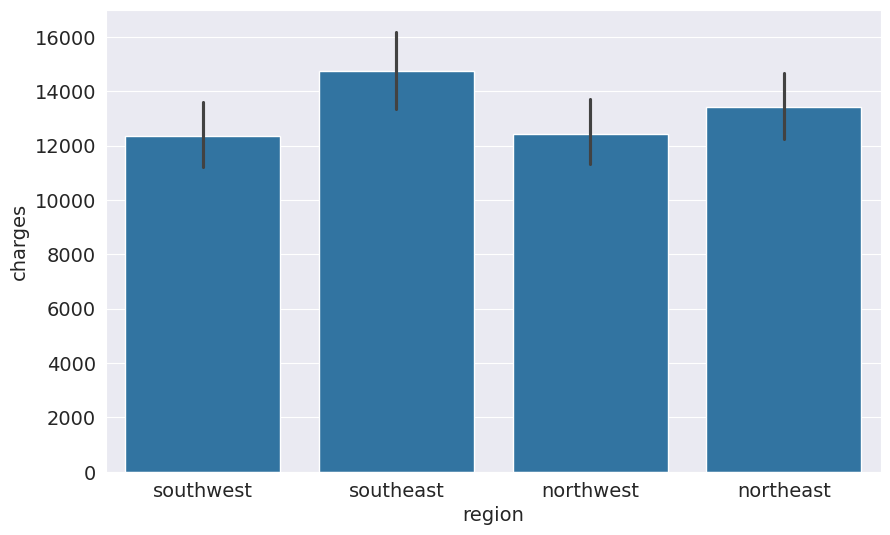

In [80]:
sns.barplot(data=medical_df, x='region', y='charges')

In [81]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [82]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [83]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


lets include the region columns into out linear regression model

charges = ((wz * age) + (w2 * bmi) + (w3 * children) + (w4 * smoker) + (w5 * sex) + (w6 * northeast) + (w7 * northwest) + (w8 * southeast) + (w9 * southwest)) + b

In [84]:
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

model = LinearRegression()
model.fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print(f'RMSE Loss: {loss}')

RMSE Loss: 6041.6796511744515


once again, this leads to a fairly small reduction in the loss

In [85]:
medical_df[input_cols].loc[10]

,10
age,25.00
bmi,26.22
children,0.00
smoker_code,0.00
sex_code,1.00
northeast,1.00
northwest,0.00
southeast,0.00
southwest,0.00


In [86]:
model.predict([[28, 30, 2, 1, 0, 0, 1, 0, 0]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([29875.81463599])

# Model Improvements

Lets discuess and apply some more improvements to out model

# Feature Scaling
Recall that de to regulatory requirements, we also need to explain the rationale behind the predictions of our model.

charges = ((wz * age) + (w2 * bmi) + (w3 * children) + (w4 * smoker) + (w5 * sex) + (w6 * northeast) + (w7 * northwest) + (w8 * southeast) + (w9 * southwest)) + b

To compare the importance of each feature in the model, our first instinct might be to compare their weights

In [87]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [88]:
model.intercept_

np.float64(-12525.547811195444)

In [89]:
# so we came up for 29,875 dollars charges based on user input above from the predictions by adding those weights, 'being smoker' alone predicts that you will gonna have 23,848 charges
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


while it looks like BMI and the 'northeast' have a higher weight than age, keep in mind that the range of values for BMI is limited (15 to 40) and the 'northeast' column only takes the values 0 and 1

Because different columns have different ranges, we run into two issues:
1. We cant compare weights of different column to edentify which features are important
2. A column with a larger ranfe of inputs may disproportionately affect the loss and dominate the optimization process

For this reason, its comon to practice to scale (pr standardized) the values in numeric column by subtracting the mean and dividing by the standard deviation

heres how to Standardized with sklearn:

In [90]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [93]:
scaler.mean_
# the mean of age is 39, the mean of bmi is 30, the mean of children is 1

array([39.20702541, 30.66339686,  1.09491779])

In [94]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

we can now scale data as follows:

In [95]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

these can now combined with the categorical data

In [96]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [97]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges
# create and train the model
model = LinearRegression()
model.fit(inputs, targets)

# generate predictions
predictions = model.predict(inputs)

# compute loss to evaluate the model
loss = rmse(targets, predictions)
print(f'RMSE Loss: {loss}')

RMSE Loss: 6041.6796511744515


we can now compare the weights in the formula:

charges = ((wz * age) + (w2 * bmi) + (w3 * children) + (w4 * smoker) + (w5 * sex) + (w6 * northeast) + (w7 * northwest) + (w8 * southeast) + (w9 * southwest)) + b

In [98]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [99]:
new_customer = [[28, 30, 2, 1, 0, 0, 1, 0, 0]]

In [100]:
scaler.transform([[28, 30, 2]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-0.79795355, -0.10882659,  0.75107928]])

In [101]:
model.predict([[-0.79795355, -0.10882659,  0.75107928, 1, 0, 0, 1, 0, 0]])

array([29875.81463371])

as you can see now, the most important feature are:
1. smoker
2. age
3. bmi

#CONGRATS

# REVIEW

# How to Approach a Machine Learning Problem
Heres a strategy you can apply to approach any machine learning problem:
1. Explore the data and find correlations between inputs and targets
2. Pick the right model, loss functions and optimizer for the problem at hand
3. Scale numeric variables and one-hot enchode categorical data
4. Set aside a test set (using a fraction of the training set)
5. Train the model
6. Make predictions on the test set and compute the loss

# Summary and Further Reading

Weve covered the following topics in tutorial:
- A typical problem statement for machine learning
- Downloading and exploring a dataset for machine learning
- Linear regression with one variable using scikit-learn
- Linear regression with multiple variables
- Using categorical feature for machine learning
- Regression coefficients and feature importance
- Creating a training and test set for reporting results